# Pandas

Juan G. Marinero Tarazona

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')
from IPython.display import display_html

# ------------------------------------------------------------------------------
# *** private functions ***

def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols} 
    # print(data) # if cols='AB' and ind=[0,1], then, data = {'A': ['A'+'0', 'A'+'1'], 'B': ['B'+'0', 'B'+'1']}
    return pd.DataFrame(data, ind)

# display() is used to print multiple DataFrames side by side (Van der Plas solution)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args): self.args = args        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
#display('df1', 'df2', 'pd.concat([df1, df2])')

# display_html() is used to print multiple DataFrames side by side ( pandas styling methods solution)
# http://pandas.pydata.org/pandas-docs/stable/style.html
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side/50899244#50899244
from IPython.display import display_html

def display_htmlFcn(*args, space=0, n=10):
    """Display HTML representation of multiple objects"""
    html_str = ''
    for index,k in enumerate(args):
        aux = eval(k)
        # debug: print(type(aux)); print(k); print(type(k));
        caption = [k[i:i+n] for i in range(0, len(k), n)]
        for index in range(len(caption)): caption[index] += '\n' 
        html_str += aux.style.set_table_attributes("style='display:inline'").set_caption(''.join(caption))._repr_html_()
        html_str += int(space)*'&nbsp'
    display_html(html_str, raw = True)
    
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [2]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Caption 1')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Caption 2')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

display_htmlFcn("make_df('AB', [1, 2])","make_df('AB', [3, 4])",space=5)

print('Combine ``display_html()`` with df.style:')
print('\tdisplay_html(df.style.highlight_max(axis=0).applymap(color_negative_red))')
df = pd.DataFrame(np.random.randint(0,100,size=(5, 4))-50, columns=list('ABCD'))
display_html(df.style.highlight_max(axis=0).applymap(color_negative_red))

print('Hierrachical DataFrame (with MultiIndex) can YES use df.style:')
hier_index = pd.MultiIndex.from_product([[2013, 2014], range(1,4)],                names=['year', 'visit'])
hier_cols  = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
df = pd.DataFrame(np.random.randint(10, size=(6,6)), index=hier_index, columns=hier_cols)
s = df.style\
.background_gradient(subset=['Sue'],cmap='Greens')\
.bar(subset=['Bob'], color='#d65f5f')\
.highlight_min(subset=['Guido'],axis=0)\
.set_properties(**{'max-width': '50px'})
display_html(s)

print('Combine ``display_html()`` and df.style:')
df1 = df;
df2 = pd.DataFrame(np.random.randint(0,100,size=(5, 4))-50, columns=list('ABCD')); 
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('df1').highlight_max(axis=0)
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('df2').applymap(color_negative_red)
display_html(df1_styler._repr_html_() + 10*'&nbsp' + df2_styler._repr_html_(), raw=True)

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4


,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4


Combine ``display_html()`` with df.style:
	display_html(df.style.highlight_max(axis=0).applymap(color_negative_red))


,A,B,C,D
0,44,-48,35,-37
1,-20,0,-37,29
2,-47,-15,25,-18
3,15,34,-3,46
4,25,14,33,-9


Hierrachical DataFrame (with MultiIndex) can YES use df.style:


subject 
 Bob 
 Guido 
 Sue 
 
 
 type 
 HR 
 Temp 
 HR 
 Temp 
 HR 
 Temp 
 
 year 
 visit 
 
 
 
 
 
 
 
 
 2013 
 1 
 8 
 7 
 7 
 2 
 5 
 7 
 
 2 
 3 
 5 
 2 
 2 
 0 
 2 
 
 3 
 3 
 5 
 7 
 5 
 8 
 0 
 
 2014 
 1 
 3 
 8 
 6 
 9 
 0 
 2 
 
 2 
 1 
 2 
 8 
 6 
 9 
 7 
 
 3 
 7 
 4 
 2 
 6 
 4 
 1

Combine ``display_html()`` and df.style:


df1 
 
 
 subject 
 Bob 
 Guido 
 Sue 
 
 
 type 
 HR 
 Temp 
 HR 
 Temp 
 HR 
 Temp 
 
 year 
 visit 
 
 
 
 
 
 
 
 
 2013 
 1 
 8 
 7 
 7 
 2 
 5 
 7 
 
 2 
 3 
 5 
 2 
 2 
 0 
 2 
 
 3 
 3 
 5 
 7 
 5 
 8 
 0 
 
 2014 
 1 
 3 
 8 
 6 
 9 
 0 
 2 
 
 2 
 1 
 2 
 8 
 6 
 9 
 7 
 
 3 
 7 
 4 
 2 
 6 
 4 
 1 
 
            
 df2 
 
 
 A 
 B 
 C 
 D 
 
 
 0 
 17 
 24 
 -10 
 5 
 
 1 
 -20 
 13 
 -48 
 -38 
 
 2 
 44 
 -39 
 -13 
 45 
 
 3 
 -1 
 43 
 -39 
 -50 
 
 4 
 36 
 30 
 39 
 39

In [3]:
print('** Pandas Style **\n')
# http://pandas.pydata.org/pandas-docs/stable/style.html

print('If it is displayed a normal DataFrame, then run this cell.\n')

df = pd.DataFrame({'A': np.linspace(1, 10, 6)})
df = pd.concat([df, pd.DataFrame(np.random.randn(6, 3), columns=list('BCD'))],
           axis=1)
df.iloc[0,0] = np.NaN

def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style\
.background_gradient(cmap='Greens',subset=['A'])\
.applymap(color_negative_red)\
.apply(highlight_max, subset=['B', 'C'], axis=0)\
.highlight_null(null_color='red')\
.set_properties(**{'background-color': '',
                   'color': '',
                   'border-color': 'red',
                   "font-size": "110%",
                   "text-align": "left",
                   'max-width': '100px'})\
.set_table_styles([dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "center")]),
                  dict(selector="caption", props=[("caption-side", "bottom")])])\
.bar(subset=['C', 'D'], align='mid', color=['#d65f5f', '#5fba7d'])\
.set_caption('Caption (not title), thus fontsize as every cell')\
.format("{:.2}")#df.style.format({'B': "{:0<4.0f}", 'D': '{:+.2f}'})
# df.style.hide_index()
#df.style.hide_columns(['C','D'])

# .set_table_styles([dict(selector="th", props=[("font-size", "150%"),    changes fontsize header e index
# df.style.hide_index()    hides index

** Pandas Style **

If it is displayed a normal DataFrame, then run this cell.



/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,A,B,C,D
0,nan,-1.1,2.3,-1.1
1,2.8,-1.0,1.1,-0.11
2,4.6,0.2,0.33,0.77
3,6.4,-0.084,-0.092,-0.13
4,8.2,-0.29,-0.0025,0.3
5,1e+01,0.25,-0.018,0.089


In [4]:
print("Instead of output we can just print it: display_html(_)") 
# "Underscore Shortcuts and Previous Outputs" 00.00-01_Preface_Summary.ipynb
display_html(_) # "_"  stand for last output (previous cell), read: 00.00-01_Preface_Summary.ipynb

Instead of output we can just print it: display_html(_)


/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,A,B,C,D
0,nan,-1.1,2.3,-1.1
1,2.8,-1.0,1.1,-0.11
2,4.6,0.2,0.33,0.77
3,6.4,-0.084,-0.092,-0.13
4,8.2,-0.29,-0.0025,0.3
5,1e+01,0.25,-0.018,0.089


# Summary

### Series
Pandas ``Series`` is much more general and flexible than the 1D NumPy array that it emulates.

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a 1D NumPy array.
The essential difference is the presence of the **index**: 

<ul  class="list-unstyled">
  <li>while the Numpy Array &nbsp;has an <font color='green'>implicitly defined</font> integer <font color='green'>index</font> used to access the values, </li>
  <li>the Pandas 
      <kbd style="background:#EEEEEE; letter-spacing:0.1em; padding-left:0.5em; padding-right:0.4em;">Series</kbd>
       has an <font color='green'>explicitly defined</font> &emsp;&emsp;&emsp; <font color='green'>index</font> associated with the values</li>
</ul>

In [5]:
print('** Series 1D**\n')
if 0:    
    print('A Pandas Series is a 1D array of indexed data.\n')
    x = pd.Series([0.25, 0.5, 0.75, 1.0]);
    # Series wraps both a sequence of values and a sequence of indices. Access it with the values and index attributes
    
    print(f"pd.Series([0.25, 0.5, 0.75, 1.0]): \n{x}\n") # 0\t 0.25\n 1\t 0.50\n 2\t 0.75\n 3\t 1.00\n dtype: float64
    print(f"x.values: {x.values}") # [0.25 0.5  0.75 1.  ] # values are simply a familiar NumPy array
    print(f"x.index : {x.index}")  # RangeIndex(start=0, stop=4, step=1) # index is an array-like object of type pd.Index
    
    print('\n',80*'-',"\nSeries has an explicitly defined INDEX associated with the values")
    x = pd.Series([0.25, 0.5, 0.75, 1.0],index=['z', 'b', 0, 'd']);
    print(f"pd.Series([0.25, 0.5, 0.75, 1.0],index=['z', 'b', 0, 'd']): \
          \n{x}") # z\t 0.25\n b\t 0.50\n 0\t 0.75\n d\t 1.00\n dtype: float64
    
    print('\n',80*'-',"\nACCESS cell like with a 1D NumPy array via square-bracket notation")
    
    print('\n',80*'-',"\nACCESS one cell")
    print(f"x['b']: {x['b']}") # 0.5
    print(f"x[1]:   {x[1]}")   # 0.5
    print(f"x[0]:      {x[0]}")     # 0.75
    print(f"x.loc[0]:  {x.loc[0]}") # 0.75
    print(f"x.iloc[0]: {x.iloc[0]}") # 0.25
    
    print('\n',80*'-',"\nACCESS multiple cellS") 
    print(f"·x[0:3]: \n{x[0:3]}")       # stop EXclusive # 0\t 0.25\n 3\t 1.00\n dtype: float64
    print(f"·x[[0, 3]]: \n{x[[0, 3]]}") # stop INclusive # ""
    print(f'·x[:]: \n{x[:]}') # 0\t 0.25\n 1\t 0.50\n 2\t 0.75\n 3\t 1.00\n dtype: float64


** Series 1D**



In [6]:
print('** Series MATRIX**\n')
if 0:
    print('\n',80*'-',"\nSeries MATRIX")
    print(f'·pd.Series([[0.,1,2],[1,2.,3]]):  \n{pd.Series([[0.,1,2],[1,2.,3]])}') # 0\t [0.0, 1, 2]\n 1\t [1, 2.0, 3]\n dtype: object
    print(f'·pd.Series([[0.,1,2],[1,2.,3]])[0]: {pd.Series([[0.,1,2],[1,2.,3]])[0]}') # [0.0, 1, 2]
    
    print('\n',80*'-','\nIndices in a Serie must be of just one HASHABLE type, i.e. either:')
    print(f"# strings:  pd.Series([1,1,1], ['a','b','end'])")
    print(f"# integers: pd.Series([1,1,1], [2,5,99])")
    print(f"# tuple:    pd.Series([1,1,1], [(2),(5),(99)])")
    # or frozenset

    print('\n',80*'-','''
    Think of a Pandas Series a bit like a specialization of a Python dictionary.
       · Dictionary is a structure that maps arbitrary keys to a set of arbitrary values
       · Series     is a structure that maps typed     keys to a set of typed     values
    ''')

    print('\nThe Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary:')
    x = {'z':33, 'a':7, 'b':99}
    x = pd.Series(x)
    print(f"pd.Series({{'z':33, 'a':7, 'b':99}}): \n{x}") # z\t 33\n a\t 7\n b\t 99\n dtype: int64   
   
    print('\n',80*'-','\nRepeated Data:')
    x = pd.Series(5, index=[100, 200, 300])
    print(f"pd.Series(5, index=[100, 200, 300]): \n{x}")
    # error: x = pd.Series([5,25], index=[100, 200, 300]); print(f"pd.Series([5,25], index=[100, 200, 300]): \n{x}")
    # error: print('\n',80*'-','\nRepeated Index:'); x = pd.Series([5, 15, 25], index=[200]); print(f"pd.Series([5, 15, 25], index=[200, 300]): \n{x}")


** Series MATRIX**



### DataFrame
If a ``Series`` is an analog of a 1D array with flexible indices, a ``DataFrame`` is an analog of a 2D array with both flexible row indices and flexible column names.
Just as you might think of a **2D array as an ordered sequence of aligned 1D columns**, you can think of a **``DataFrame`` as a sequence of aligned ``Series`` objects**.
Here, by "aligned" we mean that they share the same index.

** Quick DataFrame **

DataFrames are essentially multidimensional arrays          
 with attached row and column labels,           
 and often with heterogeneous types           
 and/or missing data.

pd.DataFrame(np.random.randint(0,100,size=(5, 4))-50, columns=list('ABCD')):


,A,B,C,D
0,2,29,5,-42
1,13,-16,43,-36
2,-37,4,-47,-30
3,34,11,21,-25
4,-21,21,-11,9


pd.DataFrame(df.dtypes)
 
 
 
 0 
 
 
 A 
 int64 
 
 B 
 int64 
 
 C 
 int64 
 
 D 
 int64 
 
                           
 pd.DataFrame(df.values)
 
 
 
 0 
 1 
 2 
 3 
 
 
 0 
 2 
 29 
 5 
 -42 
 
 1 
 13 
 -16 
 43 
 -36 
 
 2 
 -37 
 4 
 -47 
 -30 
 
 3 
 34 
 11 
 21 
 -25 
 
 4 
 -21 
 21 
 -11 
 9 
 
                           
 df.describe()
 
 
 
 A 
 B 
 C 
 D 
 
 
 count 
 5 
 5 
 5 
 5 
 
 mean 
 -1.8 
 9.8 
 2.2 
 -24.8 
 
 std 
 27.941 
 17.2829 
 33.9882 
 19.9424 
 
 min 
 -37 
 -16 
 -47 
 -42 
 
 25% 
 -21 
 4 
 -11 
 -36 
 
 50% 
 2 
 11 
 5 
 -30 
 
 75% 
 13 
 21 
 21 
 -25 
 
 max 
 34 
 29 
 43 
 9

df.index:        RangeIndex(start=0, stop=5, step=1)
df.columns:      Index(['A', 'B', 'C', 'D'], dtype='object')
type(df.values): <class 'numpy.ndarray'>
df.shape:        (5, 4)

Plot 1


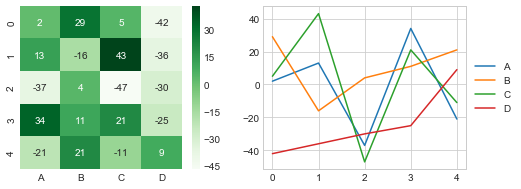

Plot 2


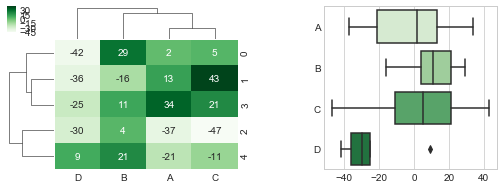

Plot 3


/home/xopi/Desktop/IT_xopi/Python/Books/SciPyAndMore/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


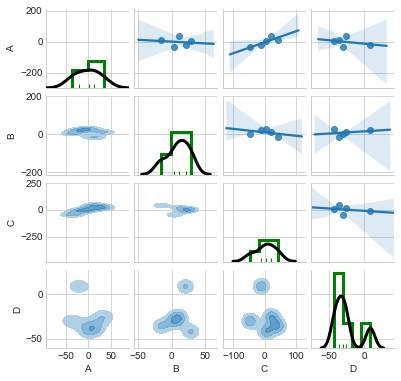

In [7]:
print('** Quick DataFrame **\n')
if 1:
    print('DataFrames are essentially multidimensional arrays\
          \n with attached row and column labels, \
          \n and often with heterogeneous types \
          \n and/or missing data.\n')
    df = pd.DataFrame(np.random.randint(0,100,size=(5, 4))-50, columns=list('ABCD'))
    print("pd.DataFrame(np.random.randint(0,100,size=(5, 4))-50, columns=list('ABCD')):")
    display_html(df.style.background_gradient(cmap='Greens').applymap(color_negative_red))
    
    display_htmlFcn("pd.DataFrame(df.dtypes)","pd.DataFrame(df.values)","df.describe()",space=25,n=25)
    
    print(f"df.index:        {df.index}")
    print(f"df.columns:      {df.columns}")
    print(f"type(df.values): {type(df.values)}")
    print(f"df.shape:        {df.shape}\n")
    
    plt.style.use('seaborn-whitegrid')
    
    i=1; print(f'Plot {i}')
    fig, ax = plt.subplots(1,2,figsize=(8, 3))
    sns.heatmap(df,cmap='Greens',annot=True, ax=ax[0])
    df.plot(ax=ax[1], grid=True);
    #ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)
    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    i+=1; print(f'Plot {i}')
    #First create the clustermap figure
    g = sns.clustermap(df, cmap='Greens',annot=True, figsize=(8,3))
    # set the gridspec to only cover half of the figure
    g.gs.update(left=0.05, right=0.45)
    #create new gridspec for the right part
    import matplotlib.gridspec
    gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
    # create axes within this new gridspec
    ax2 = g.fig.add_subplot(gs2[0])
    # plot boxplot in the new axes
    sns.boxplot(data=df, orient="h", palette="Greens", ax = ax2)
    plt.show()
    
    i+=1; print(f'Plot {i}')
    g = sns.PairGrid(df, height=3, aspect=2)
    g.map_diag(sns.distplot,
               rug=True, rug_kws={"color": "g"},
               kde_kws={"color": "k", "lw": 3, "label": "KDE"},
               hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})
    g.map_upper(sns.regplot)
    g.map_lower(sns.kdeplot,n_levels=3 ,shade=True, shade_lowest=False,alpha=.8)
    g.fig.set_size_inches(5,5)
    plt.show();

In [8]:
print('** DataFrame Construction Ways **\n')
if 0:
    print('\n',80*'-','\nFrom a 2D NumPy array')
    df = pd.DataFrame(np.random.rand(3, 2),
                 columns=['foo', 'bar'],
                 index=['a', 'b', 'c'])
    print(f"pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c']):"); display_html(df)
    
    print('\n',80*'-','\nFrom Pandas Series')
    population_dict = {'C': 3, 'T': 5, 'NY': 6}
    population = pd.Series(population_dict)
    area_dict = {'C': 2, 'T': 3, 'NY': 1}
    area = pd.Series(area_dict)
    df = pd.DataFrame({'population': population, 'area': area})
    print("pd.DataFrame({'population': pd.Series({'C':3,'T':5,'NY':6}), 'area': pd.Series({'C':2,'T':3,'NY':1})}):")
    display_html(df)

    print('\nFrom a single Pandas Series')
    df = pd.DataFrame(pd.Series(population_dict), columns=['population'])
    print(f"pd.DataFrame(pd.Series(population_dict), columns=['population']):"); display_html(df)

    print('\n',80*'-','\nFrom a list of dicts')
    data = [{'a': i, 'b': 2 * i} for i in range(3)]
    df = pd.DataFrame(data)
    print(f"pd.DataFrame([{{'a': i, 'b': 2 * i}} for i in range(3)]):"); display_html(df)

    print('\n',80*'-','\nFrom a NumPy structured array')
    df = pd.DataFrame(np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')]))
    print(f"pd.DataFrame(np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])):"); display_html(df)   

** DataFrame Construction Ways **



Notice the potential confusion: 

<ul  class="list-unstyled">
  <li>
    in a 2D NumPy array, 
    <kbd style="background:#EEEEEE; letter-spacing:0.1em; padding-left:0.5em; padding-right:0.4em;">data[0]</kbd>
      &emsp;&emsp;&emsp;will return the 1st row
    </li>
    <li>
    in a DataFrame,&emsp;&emsp;
    <kbd style="background:#EEEEEE; letter-spacing:0.1em; padding-left:0.5em; padding-right:0.4em;">data['col0']</kbd>
      will return the 1st column
    </li>
</ul>

Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.

In [9]:
print('** DataFrame CELL **')

df = pd.DataFrame(np.random.randint(10, size=(3,4)),columns='A B C D'.split(),index=['i' + str(x) for x in range(3)])
if 0:
    display_html(df.head().style.set_caption('df.head()'))
    #errors: #df[[0][0]] #df[0;0] #df[[0];[0]] #df[0,0] #df[[0],[0]]
    print(f"df.iloc[0,0]:          {df.iloc[0,0]:.{3}f}")      # same as df.iloc[0].iloc[0]
    print(f"df.iloc[0][0]:         {df.iloc[0][0]:.{3}f}")     # same as ""
    print(f"df.iloc[0]['A']:       {df.iloc[0]['A']:.{3}f}")   # same as df.iloc[0].loc['A']
    # error: #df.iloc['i0'][0]
    # error: #df.loc['i0',0]
    print(f"df.loc['i0','A']:      {df.loc['i0','A']:.{3}f}")     # same as df.loc['i0'].loc['A'] 
    print(f"df.loc['i0']['A']:     {df.loc['i0']['A']:.{3}f}")    # same as ""
    print(f"df.loc['i0'][0]:       {df.loc['i0'][0]:.{3}f}")      # same as df.loc['i0'].iloc[0]     
    print(f"df.loc['i0'].iloc[0]:  {df.loc['i0'].iloc[0]:.{3}f}") # (the proof)

** DataFrame CELL **


In [10]:
print('** DataFrame ROW **')

df = pd.DataFrame(np.random.randint(10, size=(3,4)),columns='A B C D'.split(),index=['i' + str(x) for x in range(3)])
if 0:
    display_html(df.head().style.set_caption('df.head()'))

    print('\n\n# ONE ROW:')
    display_htmlFcn("pd.DataFrame(df.iloc[-1]).T","pd.DataFrame(df.loc['i2']).T","df.iloc[[-1]]","df.loc[['i2']]",space=15,n=12)
    # error df[-1]
    # df.iloc[-1]     # pandas Series
    # df.loc['i2']    # pandas Series
    # df.iloc[[-1]]   # pandas DataFrame
    # df.loc[['i2']]  # pandas DataFrame  
    
    print('\n\n# whole ROWS: [], loc or iloc')
    display_htmlFcn("df[0:2]","df.iloc[0:2]","df.loc['i0':'i1']","df.iloc[[0,1,2]]","df.reindex(['i0','i2'])")
    # print(f"df[0:2]:       \n{df[0:2]}\n")
    # error df[[0,1,2]]
    # error df[0:2,:]
    # df.iloc[0:2]}      # stop EXclusive
    # df.loc['i0':'i1']  # stop INclusive
    # df.iloc[[0,1,2]]
    # df.loc[['i0','i2']] # !!! FutureWarning: Passing list-likes to .loc or [] with any missing label will raise KeyError in the future, you can use .reindex() as an alternative.
    # df.reindex(['i0','i2'])
    
    print('''
    Gotchas to remember when using iloc in this manner. Note that .iloc returns: 
        a Pandas Series when one row is selected, and 
        a Pandas DataFrame when multiple rows are selected, or if any column in full is selected.
    ''')
    print(f"type(df.iloc[0:2]): {type(df.iloc[0:2])}")
    print(f"type(df.iloc[-1]):  {type(df.iloc[-1])}")

** DataFrame ROW **


In [11]:
print('** DataFrame COLUMN **')

df = pd.DataFrame(np.random.randint(10, size=(3,4)),columns='A B C D'.split(),index=['i' + str(x) for x in range(3)])
if 0: 
    display_html(df.head().style.set_caption('df.head()'))
    
    print('\n# ONE COLUMN:')
    display_htmlFcn("pd.DataFrame(df['A'])","pd.DataFrame(df.iloc[:,-1])",\
                    "pd.DataFrame(df.loc[:,'C'])","df.iloc[:,[-1]]","df.loc[:,['C']]", space=28, n=28)
    #error: df[0] # no column label is 0
    # Note a ROW in Numpy is: x = np.random.randint(10,size=(3, 4)); print(f'x[0]: {x[0]}')
    # df['A']         # pandas Series
    # df.iloc[:, -1]  # pandas Series
    # df.loc[:, 'C']  # pandas Series
    # df.iloc[:,[-1]] # pandas DataFrame
    # df.loc[:,['C']] # pandas DataFrame
        
    print('\n# whole COLUMNS: [[]], loc[:, ] or iloc[:, ]') 
    # https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
    display_htmlFcn("df[['A','C']]","df.iloc[:,0:2]","df.loc[:,'A':'C']","df.iloc[:,[0,1,2]]", n=50, space=3)
    # df[['A','C']] # column names must be explicity (no ':' allowed) like: df[['A':'C']]
    # df.iloc[:, 0:2]    # stop EXclusive
    # df.loc[:, 'A':'C'] # stop INclusive
    # df.iloc[:, [0,1,2]]
    #error: #df[:, 'A':'C'] #df.loc[:, 0:2] #df[[0,2]] 

** DataFrame COLUMN **


In [12]:
print('** DataFrame ROWS_slice && COLUMNS_slice **')

df = pd.DataFrame(np.random.randint(10, size=(3,4)),columns='A B C D'.split(),index=['i' + str(x) for x in range(3)])
if 0:
    display_html(df.head().style.set_caption('df.head()'))
    
    print('# ROWS_single && COLUMNS_single')
    display_htmlFcn("df.iloc[[0,2],[1,3]]",n=50)
    
    print('# ROWS_single && COLUMNS_slice')
    display_htmlFcn("df.iloc[[0,2]]","df.iloc[[0,2]].iloc[:,0:2]","df.iloc[[0,2]].iloc[:,[0,2]]",space=15,n=50)
  
    print('# ROWS_slice  && COLUMNS_single')  
    display_htmlFcn("df.iloc[0:2,1:3]","df.iloc[0:2].iloc[:,[0,2]]",space=10,n=50)
    
    print(80*'-','\nWith the default COLUMNs LABEL, we can access directly to the k-th column(s):')
    df = pd.DataFrame(np.random.randint(10, size=(3,4)))
    
    display_htmlFcn("df","pd.DataFrame(df[0])","df[[0,2]]","df.iloc[:, 0:2]","df.loc[:,0:2]",space=20,n=50) 
    # df[0] # Note a ROW in Numpy is: x = np.random.randint(10,size=(3, 4)); print(f'x[0]: {x[0]}')
    # error: df[-1] # no column label is -1
    # df[[0,2]] # column names must be explicity (no ':' allowed) like: df[[0:2]]
    # df.iloc[:, 0:2]
    # df.loc[:, 0:2]    

** DataFrame ROWS_slice && COLUMNS_slice **


In [13]:
print('** DataFrame boolean indexing **')

df = pd.DataFrame(np.array(range(0,12)).reshape(3, 4),columns='A B C D'.split(),index=['i' + str(x) for x in range(3)])
if 0:
    display_html(df.head().style.set_caption('df.head()'))

    print('# ROWS whose COLUMN values a scalar')
    display_htmlFcn("df","pd.DataFrame(df['C'])","pd.DataFrame(df['C'] == 6)","df.loc[df['C'] == 6]",space=10)

    print('# ROWS whose COLUMN values in an iterable')
    display_htmlFcn("df","pd.DataFrame(df['C'])","pd.DataFrame(df['C'].isin(range(3,7)))",\
                    "pd.DataFrame(df.loc[df['C'].isin(range(3,7))])",\
                    "pd.DataFrame(df.loc[~df['C'].isin(range(3,7))])","df.loc[df['C'].isin([1,2,7])]",space=12,n=12)

    print('# CELL values a scalar')
    display_htmlFcn("df", "df == 7", "df[df == 7]", "df[df == 7].fillna(0)",space=10, n=50)

** DataFrame boolean indexing **


DataFrame Modify<br>
Warning: It is sometimes difficult to predict if an operation returns a copy or a view. For this reason the [docs recommend avoiding assignments with "chained indexing"](http://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy). 

In [14]:
print('** DataFrame Modify **')
if 0:
    dates = pd.date_range(start='1/1/2018',periods=6, freq='D')
    df = pd.DataFrame(np.random.randn(6,3),index=dates,columns=list('ABC'))

    df_copy = df.copy()
    df_copy['D'] = 0; #['one', 'one', 'two', 'three', 'four', 'three']

    df2 = df # no copy, thus after modifing 'df2' then 'df' is modified too
    df2.at[dates[0],'B'] = 0 # modify cell like df.loc[dates[0],'B'] = 0
    df2.iat[-1,1] = 99       # modify cell like df.iloc[-1,1] = 99
    df2.loc[:, 'A'] = np.array([5] * len(df))
    #df2.iat[:,-1] = -1 # Error: iAt based indexing can only have integer indexers
    df2.iloc[:,-1] = -1

    display_htmlFcn("df", "df_copy", "df2",space=10, n=50)

** DataFrame Modify **


In [15]:
print('** NaN **\n')

if 0:
    print(f"np.array([1, np.nan, 3, 4]).dtype: {np.array([1, np.nan, 3, 4]).dtype}")

    print('\nMissing Data in DataFrame ufuncs:')
    df = pd.DataFrame(np.random.randint(10, size=(3, 4)), columns=list('QRST'))
    df2 = df.iloc[0, ::2]
    display_htmlFcn("df", "pd.DataFrame(df.iloc[0, ::2]).T", "df - df.iloc[0, ::2]", space=10, n=20)

    print('\nRegardless of the operation, the result of arithmetic with NaN will be another NaN. E.g.:')
    print(f"\t1 + np.nan: {1 + np.nan}")
    print(f"\t0 * np.nan: {0 *  np.nan}")

    print('\nAggregations that will ignore NaN:') # np.nansum(df), np.nanmin(df), np.nanmax(df)
    print(f"·np.sum(df - df.iloc[0, ::2]):  \n{np.sum(df - df.iloc[0, ::2])}")
    print(f"·np.nansum(df - df.iloc[0, ::2]): {np.nansum(df - df.iloc[0, ::2])}")

    print('\n',80*'-','\nSeries: NaN')
    x = pd.Series([1, np.nan, 'HELLO', None])
    display_htmlFcn("pd.DataFrame(x)", "pd.DataFrame(x.isnull())", "pd.DataFrame(x[x.notnull()])", 
                    "pd.DataFrame(x.dropna())", "pd.DataFrame(x.fillna(99))", space=25, n=28)

    print('\n',80*'-','\nDataFrames: NaN')
    df = pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
    display_htmlFcn("df", "df.dropna()", "df.dropna(axis=1)", "df.dropna(how='all')", "df.dropna(axis=1,how='all')", 
                    "df.dropna(thresh=3)", space=15,n=50)
    # df.dropna()                         # drop all ROWS with ANY NaN
    # df.dropna(axis='columns')           # drop all COLS with ANY NaN
    # df.dropna(how='all')                # drop all ROWS with ALL NaN
    # df.dropna(axis='columns',how='all') # drop all COLS with ALL NaN
    # df.dropna(thresh=3)                 # only ROWS with at least 3 no-NaN

    print('\n',80*'-','\nSeries && DataFrames: replace NaN')
    x = pd.Series([1, np.nan, 'hello', None])
    df = pd.DataFrame([[1,2,np.nan],[0,np.nan,np.nan],[np.nan,4,6]])
    display_htmlFcn("df", "df.fillna(99)", "df.fillna(method='ffill')", "df.fillna(method='bfill')", 
                    "df.fillna(method='ffill', axis=1)", space=10, n=50)
    # df.fillna(99)     # replace NaN with 99
    # df.fillna(method='ffill')         # forward-fill to propagate the previous value forward
    # df.fillna(method='bfill')         # back-fill to propagate the next values backward
    # df.fillna(method='ffill', axis=1) # plus the axis option

** NaN **



### Hierarchical Indexing
*Hierarchical indexing* (also known as *multi-indexing*) to incorporate multiple index *levels* within a single index.

In [16]:
print('** Hierarchical Indexing: Basic**\n')
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside, inside)) # hier_index comes from Index Hierarchy
hier_index = pd.MultiIndex.from_tuples(hier_index)
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df.index.names = ['Group','Num']
print(f"type(df): {type(df)}\n") # <class 'pandas.core.frame.DataFrame'>
display_htmlFcn("df",
        "df.xs(1,level='Num')") # we get all cells with Num = 1
    

** Hierarchical Indexing: Basic**

type(df): <class 'pandas.core.frame.DataFrame'>



df
 
 
 
 
 A 
 B 
 
 Group 
 Num 
 
 
 
 
 G1 
 1 
 0.372589 
 -0.873417 
 
 2 
 -0.316024 
 -1.22783 
 
 3 
 1.08985 
 0.130695 
 
 G2 
 1 
 -1.43453 
 0.447564 
 
 2 
 0.579852 
 -1.01152 
 
 3 
 0.913472 
 0.0342507 
 
 
 df.xs(1,le
vel='Num')
 
 
 
 A 
 B 
 
 Group 
 
 
 
 
 G1 
 0.372589 
 -0.873417 
 
 G2 
 -1.43453 
 0.447564

In [17]:
print('** Hierarchical Indexing: Construction**\n')
if 0:
    print('The BAD WAY (rest are good ways)')
    index = [('C',2010),('C',2009), ('NY',2009),('NY',2010), ('T',2009),('T',2010)]
    populations = np.random.randint(0,100, size=6)
    df = pd.Series(populations, index=index)
    print(f"·index:       {index}")
    print(f"·populations: {populations}")
    print(f"·type(df): {type(df)}\n")
    print("pd.DataFrame(index)", "pd.DataFrame(populations)", "pd.DataFrame(pd.Series(populations, index=index))")
    # display_htmlFcn('pd.DataFrame(index)') # ValueError: DataFrame constructor not properly called!
    display_html(pd.DataFrame(index).style.set_table_attributes("style='display:inline'").set_caption("pd.DataFrame (index)")._repr_html_() + 10*'&nbsp' +\
                 pd.DataFrame(populations).style.set_table_attributes("style='display:inline'").set_caption("pd.DataFrame (populations)")._repr_html_() + 10*'&nbsp' +\
                 pd.DataFrame(populations, index=index).style.set_table_attributes("style='display:inline'").set_caption("pd.DataFrame (populations, index=index)")._repr_html_() \
                 , raw=True)
    
    
    print('Series MultiIndex')
    hier_index = pd.MultiIndex.from_tuples(index)
    print(f"·hier_index = pd.MultiIndex.from_tuples(index): \n\t{hier_index}")
    df = df.reindex(hier_index)
    print(f"·df = df.reindex(hier_index):"); display_html(df)
    
    print('\nAdd columns')
    df = pd.DataFrame({'total': df, 'col2': np.random.randn(6)})
    print(f"·df = pd.DataFrame({{'total': df, 'col2': np.random.randn(6)}}):"); display_html(df)
    
    print('\nAtractive ufuncs')
    df = (df['col2'] / df['total']).unstack()
    print(f"·df = (df['col2'] / df['total']).unstack():");
    display_html(df.style.highlight_max(axis=0))

    
    print('\n',80*'-','\nDataFrame MultiIndex');
    outside = ['G1','G1','G1','G2','G2','G2'];
    inside = [1,2,3,1,2,3];
    hier_index = list(zip(outside, inside)); # hier_index comes from Index Hierarchy
    print(f"·hier_index = list(zip(['G1','G1','G1','G2','G2','G2'], [1,2,3,1,2,3])): \n\t{hier_index}");
    hier_index = pd.MultiIndex.from_tuples(hier_index);
    print(f"·hier_index = pd.MultiIndex.from_tuples(hier_index): \n\t{hier_index}");
    df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B']);
    # print(f"·pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B']): \n{df}")
    print(f"·type(df): {type(df)}");
    x = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
    print("pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B']):"); display_html(x)

    
    print('\n',80*'-','\nStraightforward DataFrame \nThe work of creating the MultiIndex is done in the background.')
    df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
    print(f"·df = pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=['data1', 'data2']):"); display_html(df)
    x = {('C', 2000): 3,
        ('C', 2010): 2,
        ('T', 2000): 3,
        ('T', 2010): 1,
        ('N', 2000): 0,
        ('N', 2010): 9}
    df = pd.Series(x)
    print(f"·pd.Series({{('C', 2000): 3,('C', 2010): 2,('T', 2000): 3,('T', 2010): 1,('N', 2000): 0,('N', 2010): 9}}):"); display_html(pd.DataFrame(df))  

    
    print('\n',80*'-','\nExplicit MultiIndex constructors')
    hier_index = pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])
    print(f"·hier_index = pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]): \n\t{hier_index}")
    hier_index = pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])
    print(f"·hier_index = pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]): \n\t{hier_index}")
    hier_index = pd.MultiIndex.from_product([['a', 'b'], [1, 2]])
    print(f"·hier_index = pd.MultiIndex.from_product([['a', 'b'], [1, 2]]): \n\t{hier_index}")
    hier_index = pd.MultiIndex(levels=[['a', 'b'], [1, 2]], labels=[[0, 0, 1, 1], [0, 1, 0, 1]])
    print(f"·hier_index = pd.MultiIndex(levels=[['a', 'b'], [1, 2]], labels=[[0, 0, 1, 1], [0, 1, 0, 1]]): \n\t{hier_index}")

    
    print('\n',80*'-','\nMultiIndex level names: to name the levels of the MultiIndex')
    hier_index= pd.MultiIndex.from_product([['a', 'b'], [1, 2]])
    hier_index.names = ['state', 'year']
    df = pd.DataFrame(np.random.rand(4, 2),
                  index= hier_index,
                  columns=['data1', 'data2']) 
    print(f"·hier_index.names = ['state', 'year']")
    print(f"·df = pd.DataFrame(np.random.rand(4, 2), index=hier_index, columns=['data1', 'data2']):")
    display_html(df)  
    print(f"·df.index.names: {df.index.names}")

** Hierarchical Indexing: Construction**



In [18]:
print('** MultiIndex access INDICES && COLUMNS **')
if 0:
    hier_index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],                    names=['year', 'visit'])
    print(f"·hier_index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit']): \n{hier_index}")
    hier_cols  = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
    print("·hier_cols",
          f"= pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type']): \n{hier_cols}")
    df = pd.DataFrame(np.random.randint(10, size=(4,6)), index=hier_index, columns=hier_cols)
    print("pd.DataFrame(np.random.randint(10, size=(4,6)),index=hier_index,columns=hier_cols):"); display_html(df) 
    
    print('\nMultiply indexed DataFrames\n')
    display_htmlFcn("df['Guido']","pd.DataFrame(df['Guido','HR'])",n=15)
    
    print('\nloc, iloc and ix\n')
    idx = pd.IndexSlice
    display_htmlFcn("df.iloc[::2, :4]","pd.DataFrame(df.loc[:, ('Bob', 'HR')])",
                    "df.loc[idx[:, 1], idx[:, 'HR']]",space=5, n=15)

** MultiIndex access INDICES && COLUMNS **


In [19]:
print('** Rearranging MultiIndex**')
if 0:
    print('\nstack && unstack\n')
    hier_index = pd.MultiIndex.from_product([['a', 'b'], [1, 2]])
    print(f"·hier_index = pd.MultiIndex.from_tuples(index): \n\t{hier_index}")
    df = pd.DataFrame(np.random.randint(10, size=(4,2)), index=hier_index);
    display_htmlFcn("df","df.unstack()","df.unstack().stack()","df.unstack().stack(level=0)","df.unstack().stack(level=1)")
    
    print('\n',80*'-','\nSorted and unsorted indices')
    index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
    df = pd.Series(np.random.rand(6), index=index)
    df.index.names = ['char', 'int']
    print(f"·df:"); display_html(pd.DataFrame(df))
    print('\nIf we try to take a partial slice of this index, it will result in an error:')
    try: print(f"·df['a':'b']: \n{df['a':'b']}")
    except Exception as e: print(f"·Error on df['a':'b']:\t {e}")
    df = df.sort_index()
    print(f"·df = df.sort_index():"); display_htmlFcn("pd.DataFrame(df.sort_index())")
    print("No error in MultiIndex with sorted labels:")
    print(f"·df['a':'b']: "); display_html(pd.DataFrame(df['a':'b']))
    

** Rearranging MultiIndex**


From "Combining Datasets: Concat and Append" ([link here](localhost:8888/notebooks/PythonDataScienceHandBook_Vanderplas/notebooks/00.00-03_Introduction-to-Pandas_Summary.ipynb#Combining-Datasets:-Concat-and-Append) or [link here](http://localhost:8888/notebooks/00.00-03_Introduction-to-Pandas_Summary.ipynb#Combining-Datasets:-Concat-and-Append)) section till end is NOT summarized yet.

NOT summarized yet:
- [Concat](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html)
- [Aggregation and Groupby](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)
- [Pivot Tables](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)
- [String Operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)
- [Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
- [eval() and query()](https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html)